# Movie Recommendation
### Shan Wang
### 29 August, 2022

## Loading and Cleaning the Data File
Let us first read the data set from the file. This time we will work with a text file.

In [1]:
import pandas as pd
movies = pd.read_table('/mnt/workspace/downloads/15392/Movies.txt', header = None, encoding = 'GBK', sep='|')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1682 non-null   int64  
 1   1       1682 non-null   object 
 2   2       1681 non-null   object 
 3   3       0 non-null      float64
 4   4       1679 non-null   object 
 5   5       1682 non-null   int64  
 6   6       1682 non-null   int64  
 7   7       1682 non-null   int64  
 8   8       1682 non-null   int64  
 9   9       1682 non-null   int64  
 10  10      1682 non-null   int64  
 11  11      1682 non-null   int64  
 12  12      1682 non-null   int64  
 13  13      1682 non-null   int64  
 14  14      1682 non-null   int64  
 15  15      1682 non-null   int64  
 16  16      1682 non-null   int64  
 17  17      1682 non-null   int64  
 18  18      1682 non-null   int64  
 19  19      1682 non-null   int64  
 20  20      1682 non-null   int64  
 21  21      1682 non-null   int64  
 22  

In [2]:
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Because our data file does not contain a header, we use the argument, `header = None`, to indicate that the first line in the text file is the first data point. The next argument, `sep = '|'`, defines the separator character, which is '|' in our data file. Noted that the default quoting characters are '', and everything in between the quoting characters will be treated as a single string value. However, in our data file, many movie titles contain single quotation marks, which will distort the data frame read by the function `read.table` if the default quoting characters are used. 

Note that our data file does not include headers, which are stored in a separate description file. Let us add all the column names to our data set. Recall the naming convention for Python when we define the column names.

In [3]:
movies.columns = ["ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", "Mystery", "Romance", "SciFi", "Thriller", "War", "Western"]
movies.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


There are several variables that we will not use in this analysis, so we can remove them from the dataset.

In [4]:
movies.drop(['ID', 'ReleaseDate', 'VideoReleaseDate', 'IMDB'], axis = 1, inplace = True)
movies.head()

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
movies['Title']

0                                Toy Story (1995)
1                                GoldenEye (1995)
2                               Four Rooms (1995)
3                               Get Shorty (1995)
4                                  Copycat (1995)
                          ...                    
1677                            Mat' i syn (1997)
1678                             B. Monkey (1998)
1679                         Sliding Doors (1998)
1680                          You So Crazy (1994)
1681    Scream of Stone (Schrei aus Stein) (1991)
Name: Title, Length: 1682, dtype: object

In [6]:
len(movies['Title'].unique())

1664

We can observe that there are more observations than the number of movie titles, which indicates potential duplicate entries in the data set. We can use the following code to remove duplicate data points in our data set.

In [7]:
movies.drop_duplicates(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1681
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1664 non-null   object
 1   Unknown      1664 non-null   int64 
 2   Action       1664 non-null   int64 
 3   Adventure    1664 non-null   int64 
 4   Animation    1664 non-null   int64 
 5   Childrens    1664 non-null   int64 
 6   Comedy       1664 non-null   int64 
 7   Crime        1664 non-null   int64 
 8   Documentary  1664 non-null   int64 
 9   Drama        1664 non-null   int64 
 10  Fantasy      1664 non-null   int64 
 11  FilmNoir     1664 non-null   int64 
 12  Horror       1664 non-null   int64 
 13  Musical      1664 non-null   int64 
 14  Mystery      1664 non-null   int64 
 15  Romance      1664 non-null   int64 
 16  SciFi        1664 non-null   int64 
 17  Thriller     1664 non-null   int64 
 18  War          1664 non-null   int64 
 19  Western      1664 non-null 

We can see that 18 duplicate entries are removed.

## Hierarchical Clustering Analysis

Now we will use hierarchical clustering to cluster the movies in the movie lens data set by genre. 

In [8]:
X = movies.iloc[:,1:19]

We can firstly plot the dendrogram of hierarchical clustering results by `scipy.cluster.hierarchy`. `matplotlib` can help us adjust the plot.

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline

We first perform Hierarchical Clustering.
The `ward` method cares about the distance between clusters using centroid distance, and also the variance in each of the clusters. 

In [10]:
linkage_mat=sch.linkage(X,method = 'ward')
linkage_mat.shape

(1663, 4)

A $(n-1)$ by 4 matrix $L$ is returned. At the i-th iteration, clusters with indices $L[i, 0]$ and $L[i, 1]$ are combined to form cluster $n+i$. A cluster with an index less than $n$ corresponds to one of the  original observations. The distance between clusters $L[i, 0]$ and $L[i, 1]$ is given by $L[i, 2]$. The fourth value $L[i, 3]$ represents the number of original observations in the newly formed cluster.

1664 observations form 1664 clusters.

In [11]:
linkage_mat[18]

array([122., 207.,   0.,   2.])

The 123th cluster and 208th cluster forms 1683th cluster. The distance is 0 and there are two observations in 1683th cluster.

In [12]:
linkage_mat[21]

array([ 559., 1682.,    0.,    3.])

The 560th cluster and 1683th cluster forms 1686th cluster. The distance is 0 and there are three observations in 1686th cluster.

In [13]:
linkage_mat[22]

array([ 632., 1685.,    0.,    4.])

The 633th ocluster and 1686th cluster forms 1687th cluster. The distance is 0 and there are four observations in 1687th cluster.

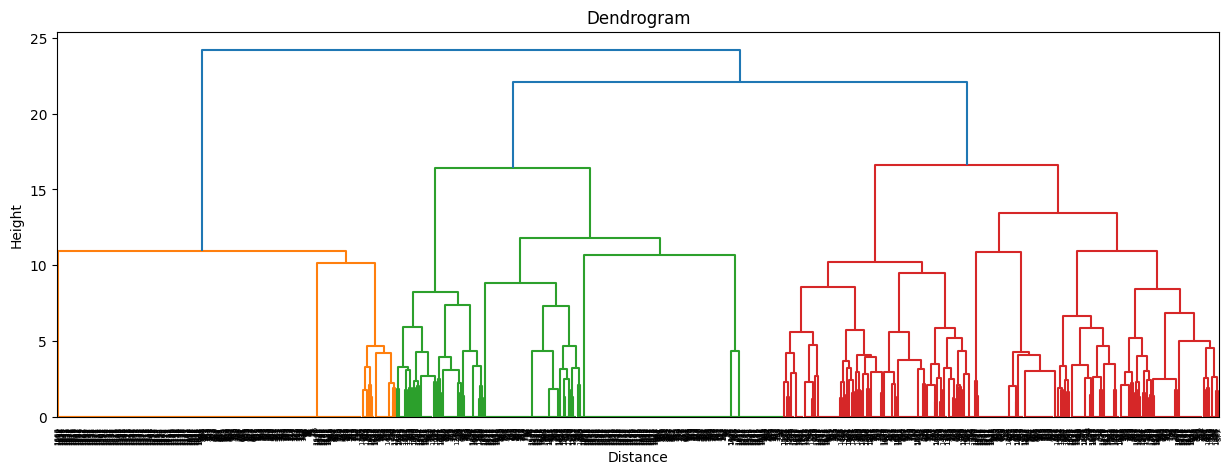

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5), dpi = 100)
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Height')

dend = sch.dendrogram(linkage_mat) #use linkage_mat to generate dendrogram

plt.show()

By set `optimal_ordering=True`, the linkage matrix will be reordered so that the distance between successive leaves is minimal. This results in a more intuitive tree structure when the data are visualized.

In [15]:
linkage_mat2=sch.linkage(X,optimal_ordering=True, method = 'ward')

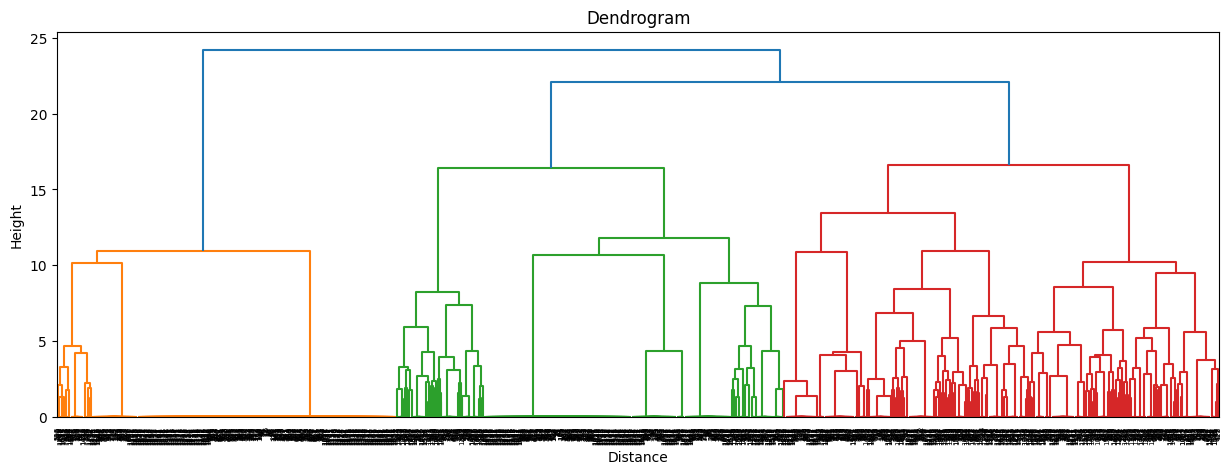

In [16]:
plt.figure(figsize = (15,5), dpi = 100)
dend = sch.dendrogram(linkage_mat2)

plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Height')

plt.show()

From the dendrogram, we can see that a good number to choose is 7 in the middle. The actual choice of number of clusters requires a lot more careful investigation and comparison. Now we just go ahead to have 7 clusters for our analysis and look at the clusters of the first 30 movie

In [17]:
#from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering

We can cluster the movies using the `AgglomerativeClustering` function for hierarchical clustering. The `ward` method cares about the distance between clusters using centroid distance, and also the variance in each of the clusters. Then 

In [18]:
clusterMovies7 = AgglomerativeClustering(n_clusters=7, linkage='ward')
clusterMovies7.fit(X)
clusterMovies7.labels_[:29]

array([4, 3, 2, 3, 2, 0, 3, 4, 0, 0, 2, 2, 1, 0, 0, 6, 2, 0, 0, 0, 6, 3,
       2, 3, 1, 1, 3, 3, 3])

Let us see how many movies are clustered in each group.

In [19]:
import numpy as np
np.unique(clusterMovies7.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6]), array([486, 287, 232, 273, 125, 119, 142]))

We are interested in what the clusters are like. We can use the `pd.crosstab` function to compute the frequency of movies in each genre and cluster.

In [20]:
pd.crosstab(index = movies['Action'], columns= clusterMovies7.labels_)

col_0,0,1,2,3,4,5,6
Action,,,,,,,
0,484,287,216,55,116,119,138
1,2,0,16,218,9,0,4


The above code divides the data points into the 7 clusters and then computes the frequency of the Action variable for each cluster. Then, we want to get the percentage. Remember that the action variable is a binary variable with value 0 or 1, so by computing the average of this variable, we are computing the percentage of movies in that cluster that belong to that genre. To see such information in a complete manner, we can use the `groupby` function.

In [21]:
movies['labels'] = clusterMovies7.labels_
movies.drop('Title', axis = 1).groupby('labels').mean()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
labels,,,,,,,,,,,,,,,,,,,
0,0.000000,0.004115,0.006173,0.000000,0.000000,0.020576,0.00000,0.002058,0.954733,0.00000,0.000000,0.000000,0.000000,0.000000,0.158436,0.002058,0.000000,0.102881,0.004115
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.264808,0.00000,0.000000,0.000000,0.000000,0.000000,0.038328,0.000000,0.000000,0.000000,0.006969
2,0.000000,0.068966,0.004310,0.000000,0.008621,0.120690,0.37069,0.000000,0.370690,0.00431,0.103448,0.017241,0.000000,0.245690,0.116379,0.025862,0.668103,0.000000,0.000000
3,0.000000,0.798535,0.329670,0.010989,0.018315,0.139194,0.07326,0.000000,0.197802,0.00000,0.000000,0.058608,0.000000,0.010989,0.073260,0.307692,0.293040,0.073260,0.032967
4,0.000000,0.072000,0.304000,0.312000,0.904000,0.336000,0.00800,0.000000,0.152000,0.16800,0.000000,0.000000,0.168000,0.000000,0.032000,0.064000,0.008000,0.000000,0.008000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.092437,0.00000,0.411765,0.067227,0.00000,0.000000,0.588235,0.000000,0.000000,0.016807,0.000000,0.092437,0.000000,0.000000
6,0.014085,0.028169,0.007042,0.000000,0.000000,0.605634,0.00000,0.000000,0.063380,0.00000,0.000000,0.000000,0.246479,0.000000,0.725352,0.007042,0.007042,0.007042,0.091549


To make a recommendation from a specific cluster, we can take a look at the movie titles in that cluster. For example, let us look at the first ten titles in the second cluster.

In [22]:
cluster2 = movies[movies['labels']==1]
cluster2['Title'].head(10)

12                              Mighty Aphrodite (1995)
24                                 Birdcage, The (1996)
25                        Brothers McMullen, The (1995)
33                          Doom Generation, The (1995)
39    To Wong Foo, Thanks for Everything! Julie Newm...
40                                 Billy Madison (1995)
41                                        Clerks (1994)
44                           Eat Drink Man Woman (1994)
46                                       Ed Wood (1994)
64                   What's Eating Gilbert Grape (1993)
Name: Title, dtype: object

## k -Means Clustering
Now let us try a different clustering technique, the k-means clustering algorithm.

In [23]:
from sklearn.cluster import KMeans

The first step in k-means clustering involves specifying the number of clusters, k. For this example, we use the result from hierarchical clustering to set k=7 to compare the clustering outcomes. In practice, determining an appropriate k requires more analysis, and there are various methods available to choose k.

In [24]:
k = 7

The following code performs k-means clustering on our data with a maximum iteration of 1000 to stop the algorithm due to its slow convergence. Since k-means clustering algorithm starts with a random partition, let us synchronize our results by setting a common seed.

In [25]:
clusterMoviesKM = KMeans(n_clusters = k, max_iter = 1000, random_state = 1)
clusterMoviesKM.fit(X)

KMeans(max_iter=1000, n_clusters=7, random_state=1)

Let us extract the cluster information from the results and store them in a new vector. We can check the clusters of the first 30 movies.

In [26]:
clusterGroupsKM = clusterMoviesKM.labels_
clusterGroupsKM[:29]

array([5, 6, 0, 1, 3, 3, 3, 1, 3, 3, 0, 0, 1, 3, 3, 2, 6, 3, 3, 3, 6, 3,
       3, 6, 1, 1, 6, 6, 6], dtype=int32)

Similarly, we can check how many movies are clustered in each group by k-means clustering.

In [27]:
np.unique(clusterGroupsKM, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([251, 386,  96, 600,  67,  79, 185]))

We can observe that these numbers are quite different from the results by hierarchical clustering. Let us use the `groupby` function to check the cluster composition.

In [28]:
movies['labels'] = clusterMoviesKM.labels_
movies.drop('Title', axis = 1).groupby('labels').mean()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
labels,,,,,,,,,,,,,,,,,,,
0,0.007968,0.000000,0.003984,0.011952,0.000000,0.000000,0.139442,0.183267,0.000000,0.003984,0.083665,0.235060,0.019920,0.107570,0.000000,0.091633,0.374502,0.027888,0.051793
1,0.000000,0.046632,0.005181,0.010363,0.077720,1.000000,0.033679,0.002591,0.202073,0.010363,0.000000,0.028497,0.028497,0.020725,0.000000,0.018135,0.020725,0.025907,0.018135
2,0.000000,0.020833,0.020833,0.010417,0.010417,1.000000,0.000000,0.000000,0.114583,0.010417,0.000000,0.000000,0.072917,0.020833,1.000000,0.010417,0.041667,0.010417,0.000000
3,0.000000,0.041667,0.006667,0.000000,0.020000,0.000000,0.066667,0.005000,1.000000,0.006667,0.003333,0.008333,0.013333,0.021667,0.125000,0.013333,0.075000,0.055000,0.008333
4,0.000000,0.298507,0.104478,0.000000,0.000000,0.000000,0.059701,0.000000,0.149254,0.000000,0.014925,0.029851,0.059701,0.059701,1.000000,0.000000,0.283582,0.089552,0.000000
5,0.000000,0.037975,0.594937,0.392405,0.898734,0.113924,0.000000,0.000000,0.063291,0.126582,0.000000,0.000000,0.240506,0.000000,0.037975,0.037975,0.000000,0.037975,0.000000
6,0.000000,0.978378,0.378378,0.016216,0.032432,0.059459,0.081081,0.000000,0.064865,0.010811,0.000000,0.070270,0.010811,0.032432,0.016216,0.313514,0.421622,0.059459,0.010811


For comparison, let us look at the first ten titles in the second cluster.

In [29]:
cluster2KM = movies[movies['labels']==1]
cluster2KM['Title'].head(10)

3                                     Get Shorty (1995)
7                                           Babe (1995)
12                              Mighty Aphrodite (1995)
24                                 Birdcage, The (1996)
25                        Brothers McMullen, The (1995)
33                          Doom Generation, The (1995)
39    To Wong Foo, Thanks for Everything! Julie Newm...
40                                 Billy Madison (1995)
41                                        Clerks (1994)
44                           Eat Drink Man Woman (1994)
Name: Title, dtype: object